In [ ]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import plotly.figure_factory as ff
import datetime

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
df = pd.read_excel('TimeSeriesDataDaukhi.xlsx')
df = pd.DataFrame(df)

In [ ]:
df.head(5)

,Date,PCG,PLX,PVB,PVC,PVO
0,2017-01-03,8.6,NaN,10.9,8.0,3.5
1,2017-01-04,8.6,NaN,10.9,8.1,3.5
2,2017-01-05,8.6,NaN,10.5,8.1,3.6
3,2017-01-06,8.6,NaN,10.3,8.0,3.6
4,2017-01-09,8.6,NaN,10.4,8.1,3.7


In [ ]:
#Convert Date to datetime data and arrange 
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values(by='Date')

In [ ]:
#tính giá trị trung bình mỗi cột
PCG=df['PCG'].mean(axis=0)
PLX=df['PLX'].mean(axis=0)
PVB=df['PVB'].mean(axis=0)
PVC=df['PVC'].mean(axis=0)
PVO=df['PVO'].mean(axis=0)

In [ ]:
# create date time features of a dataset
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day

In [ ]:
#Set index
df.set_index('Date',inplace=True)

# **BẮT ĐẦU TỪ ĐÂY**

# **PREPARERATION**

## **Import data đã qua xử lý**







In [ ]:
df = pd.read_excel('/content/XuLyDaukhixyz.xlsx')
df = pd.DataFrame(df)
#Set index
df.set_index('Date',inplace=True)

## **Resample chuỗi theo Month**

In [ ]:
#Resample chuỗi dữ liệu theo tháng
df0= df.resample(rule="M").mean()

In [ ]:
df.index[-1]

Timestamp('2021-12-31 00:00:00')

## **Chia tập train và test theo thời gian và trực quan**

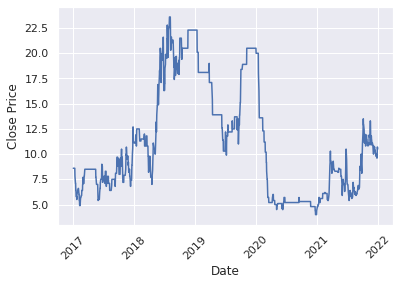

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df.index, df['PCG'], )

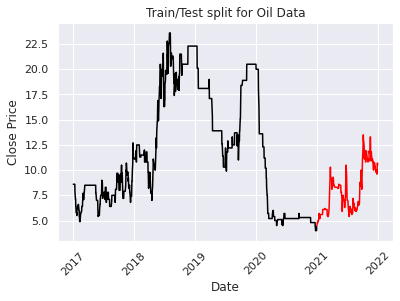

In [ ]:
train = df[df.index < pd.to_datetime("2021-1-01", format='%Y-%m-%d')]
test = df[df.index >= pd.to_datetime("2021-1-01", format='%Y-%m-%d')]

plt.plot(train['PCG'], color = "black")
plt.plot(test['PCG'], color = "red")
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Oil Data")
plt.show()

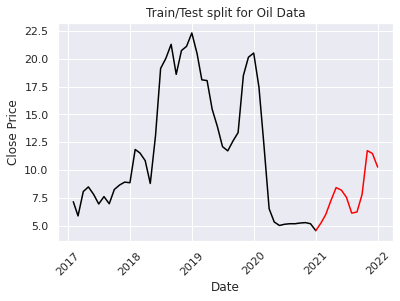

In [ ]:
#Chia Train vs Test theo time
train = df0[:'2020-12']
test = df0['2020-12':]

plt.plot(train['PCG'], color = "black")
plt.plot(test['PCG'], color = "red")
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Oil Data")
plt.show()

In [ ]:
print(train.index[-1])
print(test.index[0])

2020-12-31 00:00:00
2020-12-31 00:00:00


# **Kiểm tra tính dừng**

The series is stationary
None


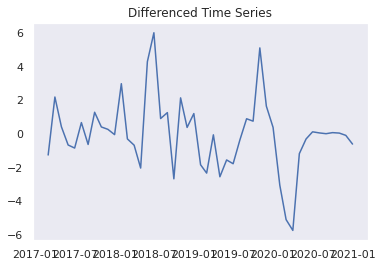

<Figure size 576x432 with 0 Axes>

In [ ]:
#kiem tra tinh dung (stationarity)
from statsmodels.tsa.stattools import adfuller
import numpy as np
#ham check
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

#transform de duoc tinh dung
ts_diff = train['PCG'].diff()
ts_diff.dropna(inplace=True)
print(check_stationarity(ts_diff))


plt.plot(ts_diff)
plt.title('Differenced Time Series')
plt.grid()
plt.figure(figsize=(8,6))
plt.show()

# **Chuẩn bị tham số (p,d,q) cho mô hình dự đoán**

1.   PAC chart
2.   AC chart



/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


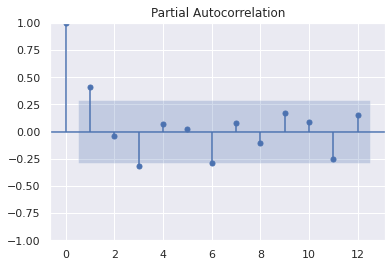

In [ ]:
#p order
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(ts_diff, lags =12)
plt.show()
#p=3,1

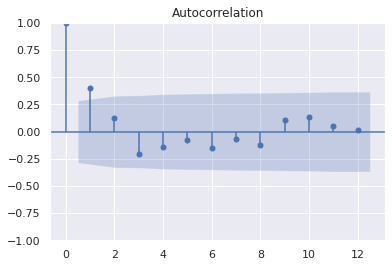

In [ ]:
#q order
plot_acf(ts_diff, lags =12)
plt.show()
#q=1

# **Kiểm tra tính mùa vụ**

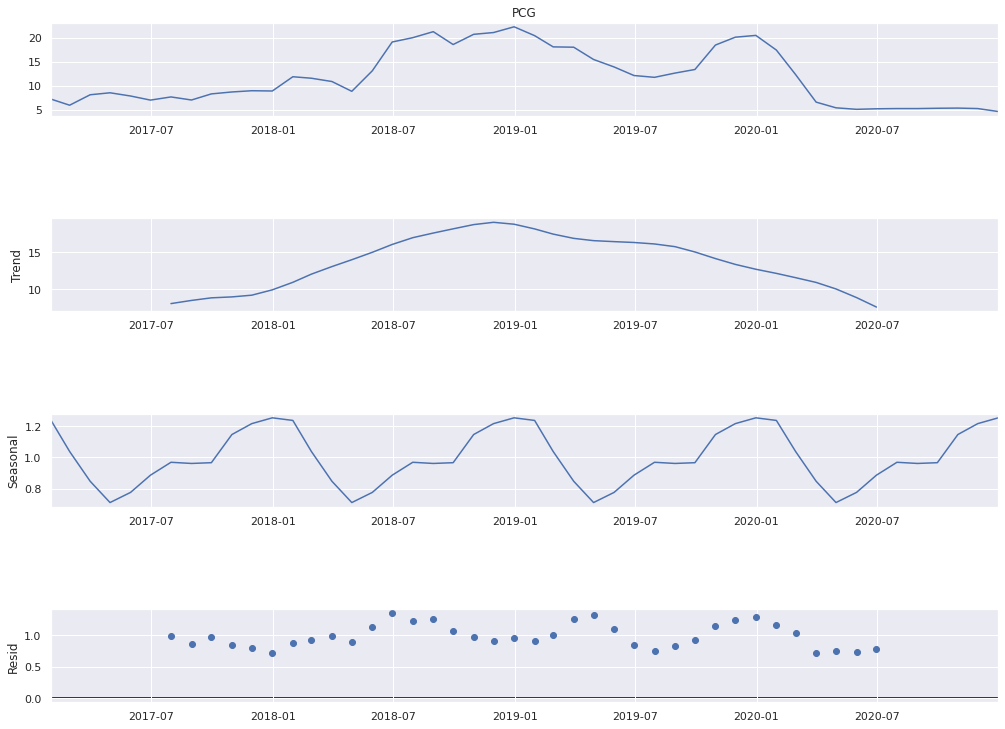

In [ ]:
#Check tính mùa vụ
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(y, model='multiplicative')
fig = result.plot()
fig.set_size_inches(16, 12)

# **Chuẩn bị bộ tham số (P,D,Q,M) cho mô hình SARIMAX**

In [ ]:
#(P,D,Q,M) M=12
#D
#Nếu tính mùa có độ ổn định thì D=0
seasonal = result.seasonal
check_stationarity(seasonal)

The series is stationary


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


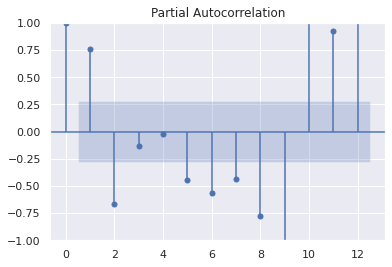

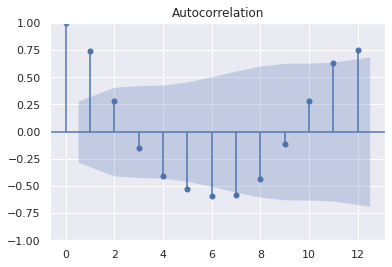

In [ ]:
#P order
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(seasonal, lags =12)
plt.show()
#P=12
#Q order
plot_acf(seasonal, lags =12)
plt.show()
#Q=8

# **Thử nghiệm với mô hình**







## **1. Lựa chọn cặp tham số phù hợp dựa trên AIC**

In [ ]:
#Lựa chọn mô hình ARIMA tốt nhất dựa trên các cặp số (p,d,q) đã chọn từ biểu đồ AIC
from statsmodels.tsa.arima.model import ARIMA

def _arima_fit(orders, data):
  models = dict()
  for order in orders:
    model = ARIMA(data, order = order).fit()
    model_name = 'ARIMA({},{},{})'.format(order[0], order[1], order[2])
    print('{} --> AIC={}; BIC={}'.format(model_name, model.aic, model.bic))
    models[model_name] = model
  return models

orders = [(3, 1, 1), (1, 1, 1), (6,1,1),(0,1,3)]
models = _arima_fit(orders, y)

ARIMA(3,1,1) --> AIC=202.4334225281568; BIC=211.68416053670708
ARIMA(1,1,1) --> AIC=202.9000135349632; BIC=208.45045634009335
ARIMA(6,1,1) --> AIC=204.84525390610418; BIC=219.64643471978465
ARIMA(0,1,3) --> AIC=198.7258052293692; BIC=206.12639563620942


## **2. Lựa chọn cặp tham số phù hợp dựa package auto ARIMA**

In [ ]:
#Cách chọn mô hình theo chỉ số AIC khá đơn giản => sử dụng package auto arima
#Tim tham so tu dong cho ARIMA Model

import pmdarima as pm
stepwise_model = pm.auto_arima(y,start_p=1, d=1, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=True, stationary=False,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model.fit(y)

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [ ]:
#Khởi tạo mô hình ARIMA ngẫu nhiên
from statsmodels.tsa.arima.model import ARIMA

y=train['PCG']

model_arima = ARIMA(y, order = (3, 1, 1))
model_fit = model_arima.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    PCG   No. Observations:                   48
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 -96.217
Date:                Sun, 12 Mar 2023   AIC                            202.433
Time:                        16:29:27   BIC                            211.684
Sample:                    01-31-2017   HQIC                           205.915
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2608      0.364      0.717      0.474      -0.453       0.974
ar.L2          0.1454      0.219      0.662      0.508      -0.285       0.575
ar.L3         -0.3003      0.181     -1.661      0.0

# **ARMA**

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


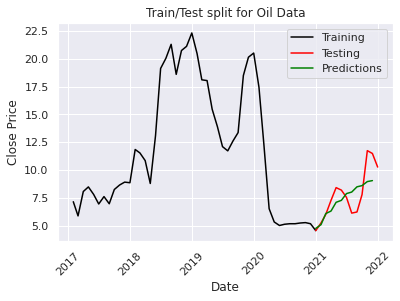

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

#train.index = pd.DatetimeIndex(train.index.values, freq=train.index.inferred_freq)

y=train['PCG']

#ARMA 
ARMAmodel = SARIMAX(y, order = (3, 1, 4))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index)) #số ngày dự đoán
y_pred_df = y_pred.conf_int(alpha = 0.05) #khoảng tin cậy
y_pred_df["Predictions"] = ARMAmodel.predict(start = test['PCG'].index[0], end = test['PCG'].index[-1])
y_pred_df.index = test.index
y_pred_out1 = y_pred_df["Predictions"]

#Visualize Dự báo của mô hình 
plt.plot(train['PCG'], color = "black", label = 'Training')
plt.plot(test['PCG'], color = "red", label = 'Testing')
plt.plot(y_pred_out1, color='green', label = 'Predictions')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Oil Data")
plt.legend()

In [ ]:
#tính RMSE, MSE (mean square error)
#RMSE (root mean square error)
#MAE (mean absolute error)
#MAPE (mean absolute percentage error)

import numpy as np
from sklearn.metrics import mean_squared_error
#rmse
arma_rmse = np.sqrt(mean_squared_error(test["PCG"].values, y_pred_out1))
print("RMSE: ",arma_rmse)
#Các chỉ số này càng nhỏ thì chứng tỏ mô hình dự báo càng khớp với giá trị thực tế.

RMSE:  1.4532041818868464


# **ARIMA**

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


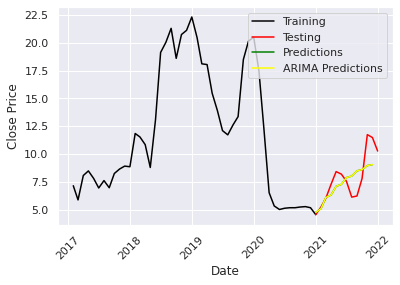

In [ ]:
ARIMAmodel = ARIMA(y, order = (3, 1, 4))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = test['PCG'].index[0], end = test['PCG'].index[-1])
y_pred_df.index = test.index
y_pred_out2 = y_pred_df["Predictions"] 

plt.plot(train['PCG'], color = "black", label = 'Training')
plt.plot(test['PCG'], color = "red", label = 'Testing')
plt.plot(y_pred_out1, color='green', label = 'Predictions')
plt.plot(y_pred_out2, color='Yellow', label = 'ARIMA Predictions')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.legend()

In [ ]:
arma_rmse = np.sqrt(mean_squared_error(test["PCG"].values, y_pred_out2 ))
print("ARIMA RMSE: ",arma_rmse)

ARIMA RMSE:  1.4532041818868464


# **SARIMAX**

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


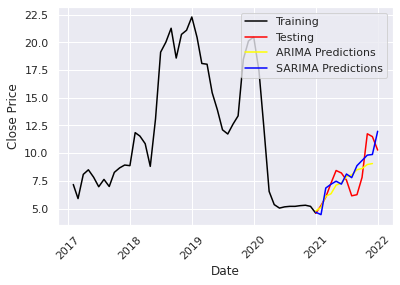

In [ ]:
SARIMAXmodel = SARIMAX(y, order = (3, 1, 4), seasonal_order=(0,0,8,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out3 = y_pred_df["Predictions"] 

plt.plot(train['PCG'], color = "black", label = 'Training')
plt.plot(test['PCG'], color = "red", label = 'Testing')
#plt.plot(y_pred_out1, color='green', label = 'Predictions')
plt.plot(y_pred_out2, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out3, color='Blue', label = 'SARIMA Predictions')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.legend()

# **EVALUATION**

In [ ]:
def _measure_metric(y, yhat):
  e = y-yhat
  mse=np.mean(e**2)
  rmse=np.sqrt(mse)
  mae=np.mean(np.abs(e))
  mape=np.mean(e/y)

  print('Mean Square Error: {}'.format(mse))
  print('Root Mean Square Error: {}'.format(rmse))
  print('Mean Absolute Error: {}'.format(mae))
  print('Mean Absolute Percentage Error: {}'.format(mape))
  return mse, rmse, mae, mape

mse, rmse, mae, mape=_measure_metric(test['PCG'], y_pred_out3)

Mean Square Error: 1.899811633554755
Root Mean Square Error: 1.378336545824261
Mean Absolute Error: 1.182484562581708
Mean Absolute Percentage Error: -0.04335529420251348


# **FORECAST FUTURE**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

#DỰ BÁO CHUỖI THỜI GIAN SẮP TỚI

col = df0['PCG'] 

SARIMAXmodelX = SARIMAX(col, order = (3, 1, 4), seasonal_order=(0,0,8,12))
SARIMAXmodelX = SARIMAXmodelX.fit()

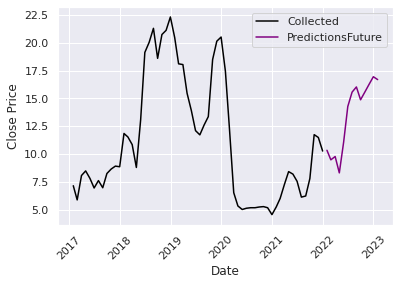

In [ ]:
forecast_periods = 13
string_date1 = "2022-1-31 00:00:00"
string_date2 = "2023-01-31 00:00:00"
format_str = '%Y-%m-%d %H:%M:%S'
start_date = datetime.strptime(string_date1, format_str)
end_date = datetime.strptime(string_date2, format_str)
#start_date = datetime('2022-11-31')  # ngày bắt đầu dự đoán
#end_date = '2023-01-31' #ngày kết thúc dự đoán

# Dự đoán và tính toán khoảng tin cậy 95%
y_pred = SARIMAXmodelX.get_forecast(forecast_periods)
y_pred_df = y_pred.conf_int(alpha = 0.05) 

# Lấy ra dự đoán trong khoảng thời gian cần quan tâm
y_pred_df["PredictionsFuture"] = SARIMAXmodelX.predict(start = start_date, end = end_date)
#y_pred_df.index = test.index
y_pred_out4 = y_pred_df["PredictionsFuture"] 

plt.plot(df0['PCG'], color = "black", label = 'Collected')
plt.plot(y_pred_out4, color='purple', label = 'PredictionsFuture')

plt.ylabel('Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.legend()